In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from taskdataset import TaskDataset
import torchvision
import cv2

path_to_data = "datasets/ModelStealingPub.pt" # TODO Set path to datasets files

In [14]:

# import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [27]:
dataset = torch.load(path_to_data)

ids = []
imgs = []
labels = []

ids_gray = []
imgs_gray = []
labels_gray = []

gray = 0
rgb = 0

for i in range(len(dataset)):
    el = [dataset.ids[i], np.array(dataset.imgs[i]), int(dataset.labels[i])]

    # if el[1].shape != (32, 32, 3):
    #     rgb += 1
    #     ids.append(el[0])
    #     imgs.append(el[1])
    #     labels.append(el[2])        
    # else:
    #     gray += 1
    #     ids_gray.append(el[0])
    #     imgs_gray.append(el[1])
    #     labels_gray.append(el[2])
    if el[1].shape != (32, 32, 3):
        #convert to RGB
        el[1] = cv2.cvtColor(el[1], cv2.COLOR_GRAY2RGB)
        #convert to tensor
        dataset.imgs[i] = torch.from_numpy(el[1])
    else:
        #convert to tensor
        dataset.imgs[i] = torch.from_numpy(el[1])
    

    if el[1].shape != (32, 32, 3):
        rgb += 1
        # ids.append(el[0])
        # imgs.append(el[1])
        # labels.append(el[2])        
    else:
        gray += 1
        # ids_gray.append(el[0])
        # imgs_gray.append(el[1])
        # labels_gray.append(el[2])
        
        


print("Gray: ", gray)
print("RGB: ", rgb)


# create dataset
# imgs = TaskDataset(imgs, transform)
# imgs_gray = TaskDataset([ids_gray, imgs_gray, labels_gray], transform)


loader = torch.utils.data.DataLoader(dataset = dataset.imgs,
                                     batch_size = 32,
                                     shuffle = True)

Gray:  13000
RGB:  0


180360

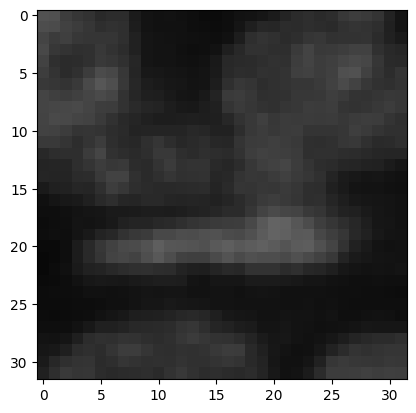

In [36]:
# for data in iter(dataset):
#     print(data)

# plt.imshow(dataset[0])
plt.imshow(dataset[10][1])
dataset[10][0]

In [46]:
dataiter = iter(loader)
next(dataiter).shape


torch.Size([32, 32, 32, 3])

torch.Tensor

In [ ]:
a = np.array(dataset.imgs[0])
print(a.shape)

len(dataset)

(32, 32, 3)


13000

In [ ]:

# # Transforms images to a PyTorch Tensor
# tensor_transform = transforms.ToTensor()
 
# # Download the MNIST Dataset
# dataset = datasets.MNIST(root = "./data",
#                          train = True,
#                          download = True,
#                          transform = tensor_transform)
 
# # DataLoader is used to load the dataset 
# # for training
# loader = torch.utils.data.DataLoader(dataset = dataset,
#                                      batch_size = 32,
#                                      shuffle = True)

# Encoder

In [38]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(3 * 32 * 32, 1536),
            torch.nn.ReLU(),
            torch.nn.Linear(1536, 1536),
            torch.nn.ReLU(),
            torch.nn.Linear(1536, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
        )
         
 
    def forward(self, x):
        encoded = self.encoder(x)
        return encoded

In [39]:
# # Wczytanie danych
# path_to_data = "datasets/ModelStealingPub.pt"
# data = torch.load(path_to_data)

# # Przygotowanie danych treningowych (załóżmy, że dane są już gotowe w odpowiednim formacie)
# train_loader = torch.utils.data.DataLoader(data, batch_size=64, shuffle=True)

# Inicjalizacja modelu
model = AE()

# Definicja funkcji straty i optymalizatora
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trening modelu
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, _ in loader:
        inputs = inputs.view(-1, 3 * 32 * 32)  # Przekształcenie danych do odpowiednich wymiarów
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)  # Porównujemy wyjście modelu z danymi wejściowymi
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(loader)}")

print("Training finished")

ValueError: too many values to unpack (expected 2)

In [40]:
# Model Initialization
model = AE()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)

# Train

In [41]:
epochs = 3
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in loader:
       
      # Reshaping the image to (-1, 784)
      image = image.reshape(-1, 28*28)
       
      # Output of Autoencoder
      reconstructed = model(image)
       
      # Calculating the loss function
      loss = loss_function(reconstructed, image)
       
      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
       
      # Storing the losses in a list for plotting
      losses.append(loss)
    outputs.append((epochs, image, reconstructed))
 
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses[-100:])

ValueError: too many values to unpack (expected 2)